In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv',encoding = "ISO-8859-1")

In [ ]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
df['Premiere'] = df['Premiere'].apply(lambda x: x.replace(',', '').replace('.', '') if isinstance(x, str) else x)


In [ ]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,August 5 2019,58,2.5,English/Japanese
1,Dark Forces,Thriller,August 21 2020,81,2.6,Spanish
2,The App,Science fiction/Drama,December 26 2019,79,2.6,Italian
3,The Open House,Horror thriller,January 19 2018,94,3.2,English
4,Kaali Khuhi,Mystery,October 30 2020,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,December 31 2018,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,October 9 2015,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,December 16 2018,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,December 8 2020,89,8.6,Portuguese


In [ ]:
df['Premiere'] = pd.to_datetime(df['Premiere'], format= "%B %d %Y")

# columns year, month and weekday
df['year']    = df['Premiere'].dt.year
df['month']   = df['Premiere'].dt.month_name()
df['weekday'] = df['Premiere'].dt.day_name()


In [ ]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,October,Friday
...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018,December,Monday
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015,October,Friday
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018,December,Sunday
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020,December,Tuesday


In [ ]:
# language were the long-running films created according to the dataset
fig = px.box(df, x= 'Runtime', hover_data = df[['Title','Language']])
fig.update_traces(quartilemethod="inclusive")
fig.show()


In [ ]:
#IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020

df_doc = df[ ((df["year"]== 2019) |
              ((df["year"]== 2020) & ((df["month"] ==("January"))| (df["month"] ==("February"))| (df["month"] ==("March"))| (df["month"] ==("April")) | (df["month"] ==("May")) | (df["month"] ==("June")))) )
              & (df["Genre"]== "Documentary")  ]

In [ ]:
fig = px.scatter(df_doc, x= 'year',y= 'IMDB Score',color="month"	 )
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
#average runtime of movies shot in Hindi
df_hindi = df[df['Language'] =='Hindi']

In [ ]:
df_hindi.Runtime.value_counts()
df_hindi.Runtime.mean()

115.78787878787878

In [ ]:
# types of categories  the Genre Column have
df['Genre'].value_counts()
df['Genre'].value_counts().sum()
Gerns = df['Genre'].value_counts()

In [ ]:
fig = px.bar(Gerns, x= Gerns.index, y=Gerns.values, labels={'y':'Number of Movies from the Genre', 'index':'Genres'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
 top_language = df.value_counts().nlargest(3)

<ipython-input-55-1139b38553a8>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



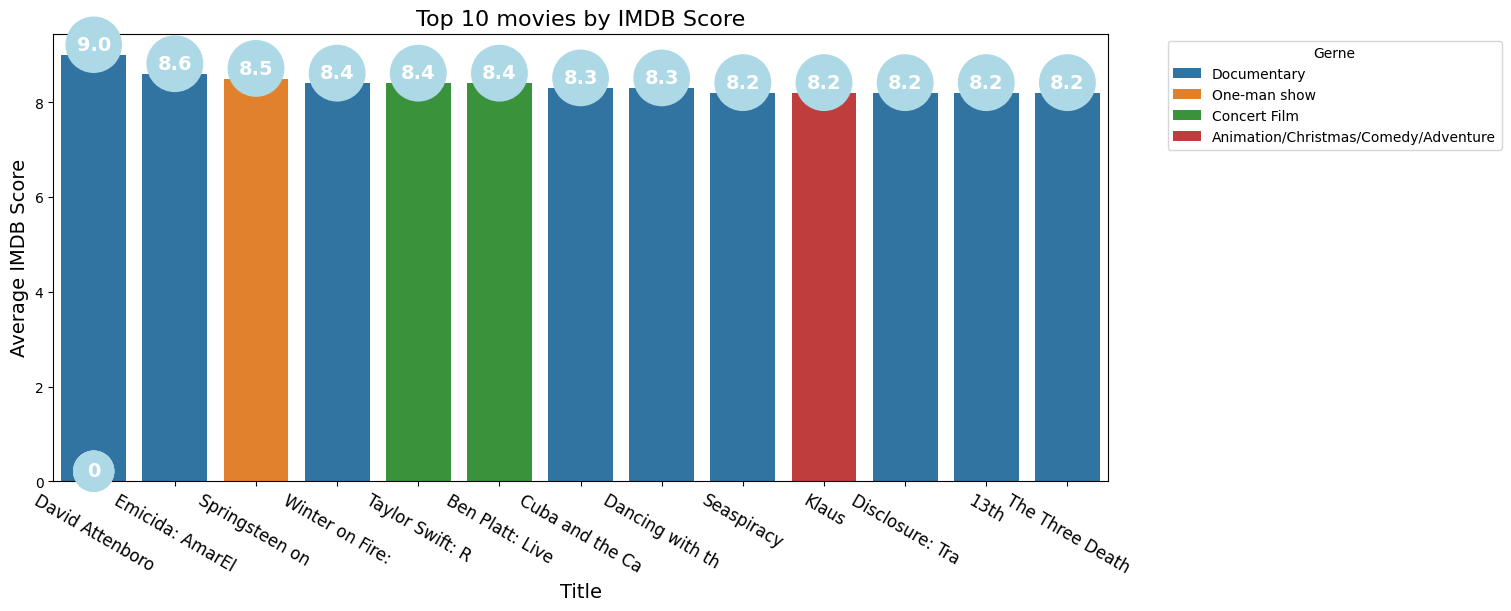

In [ ]:
#Top 10 Movies With IMDB Ratings
df_temp=df.sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:13,:]

fig, ax = plt.subplots(1,1, figsize = (15, 6), constrained_layout = True)
ax = sns.barplot(x = 'Title', y = 'IMDB Score', data = df_temp, hue = 'Genre')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+0.1,
            s = f"{i.get_height()}",
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="circle,pad=0.5", fc='lightblue', ec="lightblue", lw=2))


ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Title'].unique()], fontsize=12, rotation = -30)
plt.title('Top 10 movies by IMDB Score', fontsize=16)
plt.legend(title='Gerne', bbox_to_anchor=(1.05, 1), loc='upper left');

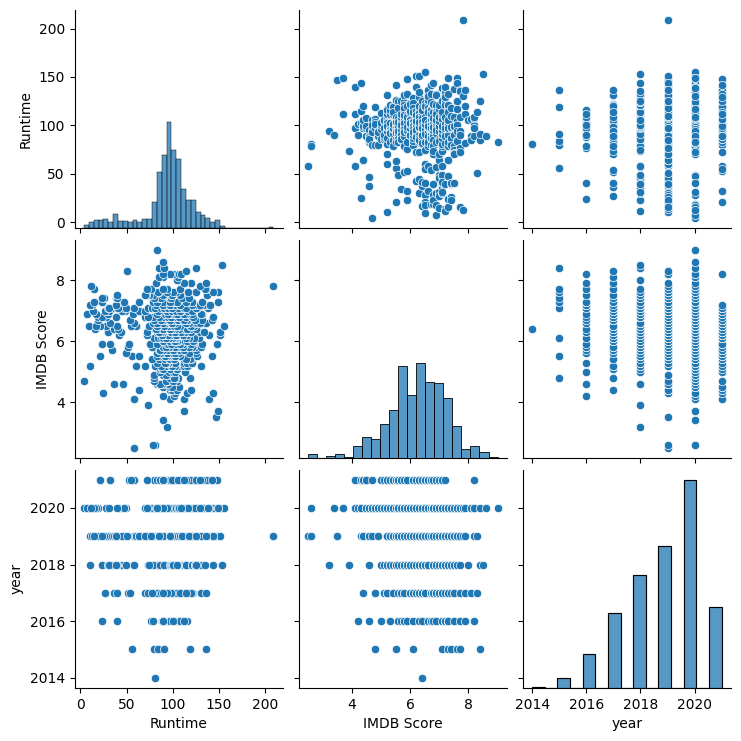

In [ ]:
# dataset over view
sns.pairplot(df)

In [ ]:
df[['IMDB Score','Runtime']].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


In [ ]:
 fig = px.scatter(df, x='IMDB Score',y='Runtime')
 fig.show()

In [ ]:
df_temp = df.groupby(['Genre']).mean(['IMDB rating']).sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]

<ipython-input-66-834527e906cb>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



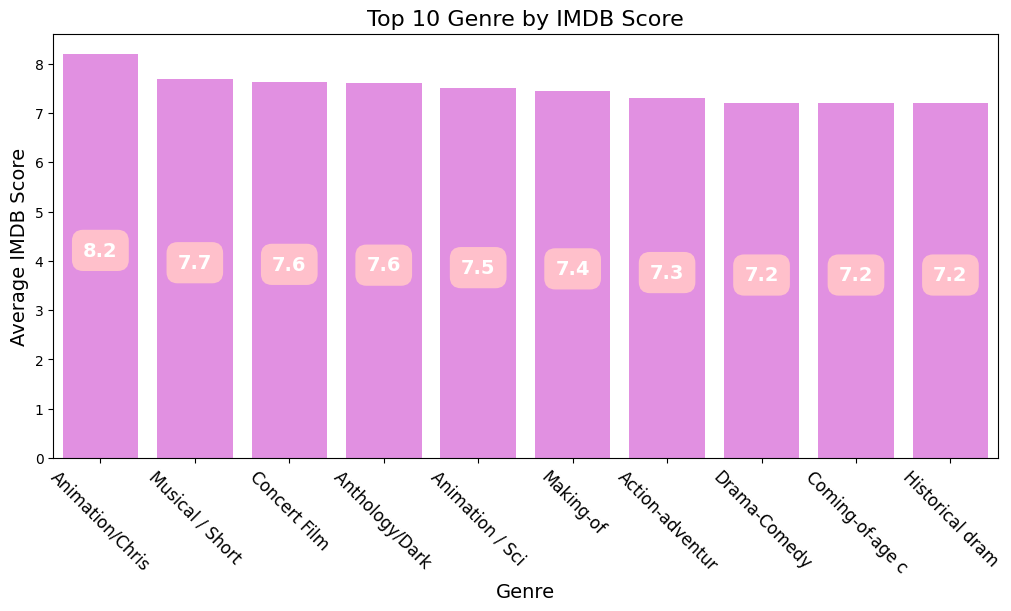

In [ ]:
df_temp=df.groupby(['Genre']).mean(['IMDB rating']).sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]

fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = sns.barplot(x = 'Genre', y = 'IMDB Score', data = df_temp, color = 'violet')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}",
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))


ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Genre'].unique()], fontsize=12, rotation = -45 )
plt.title('Top 10 Genre by IMDB Score', fontsize=16);

<ipython-input-74-82d82ca3aeab>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




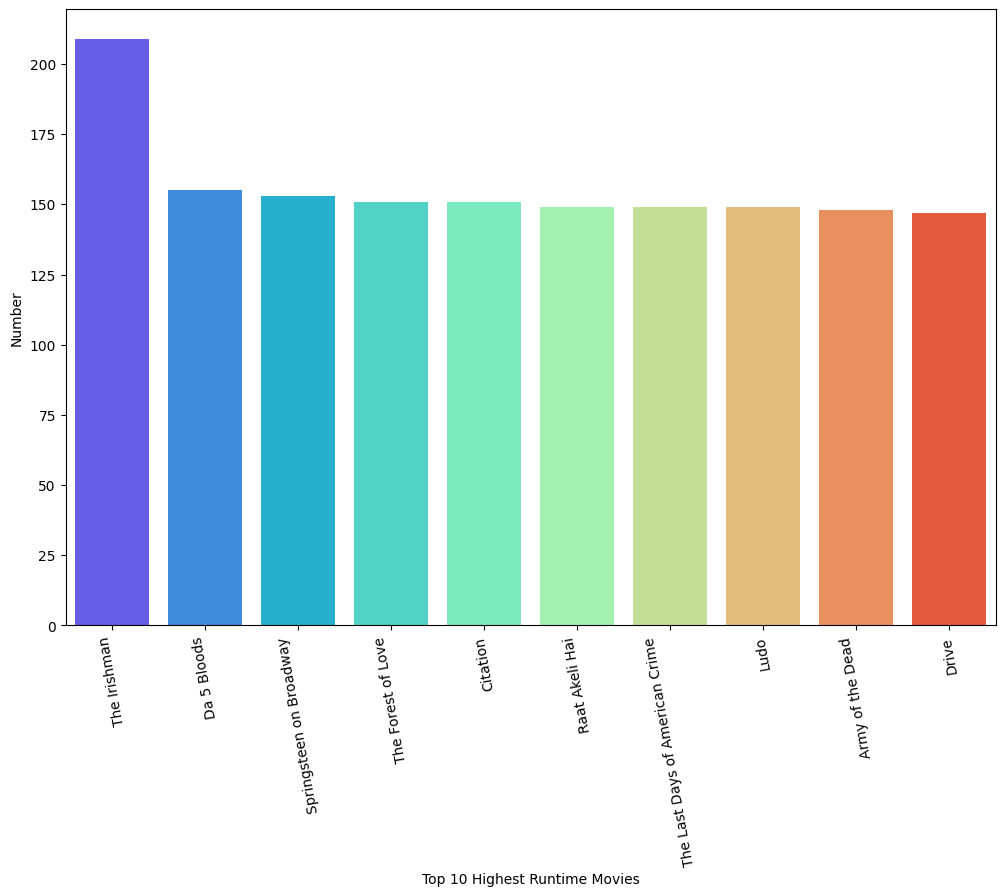

In [ ]:
df_te = df.groupby(['Title']).mean(['Runtime rating']).sort_values(by = 'Runtime', ascending=False).reset_index().iloc[:10,:2]
plt.figure(figsize=(12,8))
sns.barplot(x=df_te['Title'], y=df_te['Runtime'], data=df, palette='rainbow')
plt.xlabel('Top 10 Highest Runtime Movies')
plt.xticks(rotation =100)
plt.ylabel('Number')
plt.show()

<ipython-input-78-23332bec5b60>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




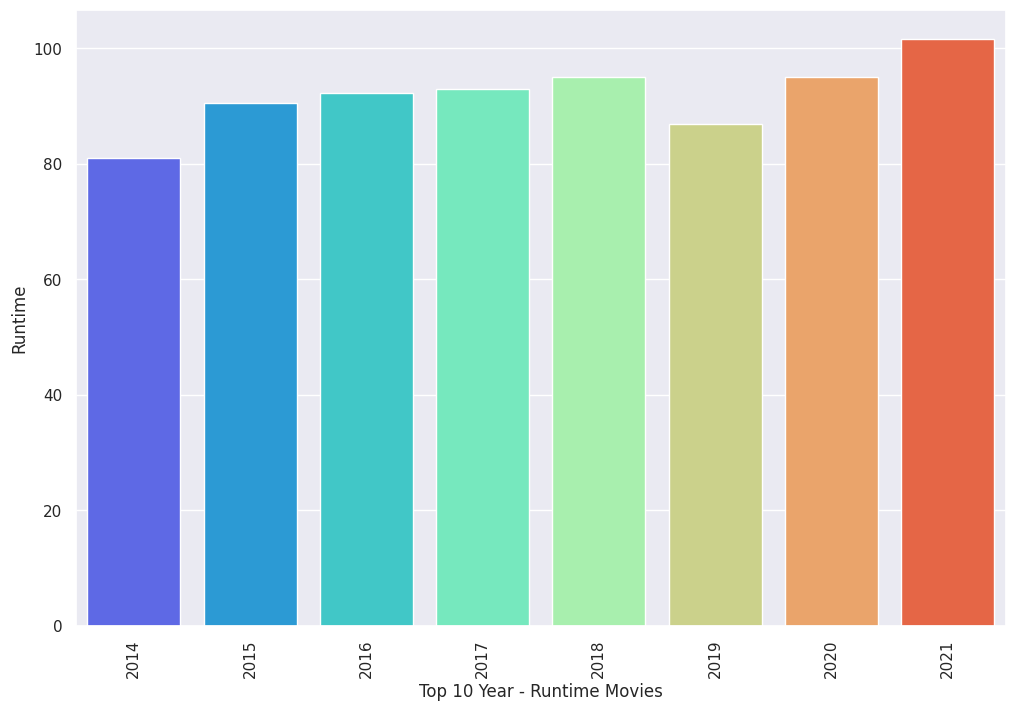

In [ ]:
# greatest total runtime
df_temp=df.groupby(['year']).mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10,:2]

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_temp["year"],y=df_temp["Runtime"],data=df,palette='rainbow')
plt.xlabel('Top 10 Year - Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Runtime')
plt.show()


In [ ]:


df_run= df[df["year"] ==2021]
df_run.Runtime.mean()

101.6056338028169

In [ ]:
	#outliers

fig = px.scatter(x=df['Runtime'], y=df['Title'])
fig.show()
